In [1]:
import pandas as pd
from votings_to_csvfile import arrange_votings
from deputy_votings import deputy_votes

df_laws = pd.read_csv('pages/csv/6sep-15nov-2.csv', sep='|')

In [2]:
df_laws.head(10)

,vote_link,law,reading,initiators,committee
0,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона «О праве на доступ к информац...,3,"[Председатель Кабинета Министров, вх. № 6-175...","[конституционному законодательству, государст..."
1,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона «О внесении изменений в Закон...,2,"[Чойбеков Б.К., вх. № 6-5229/23 от 13.04.23]","[конституционному законодательству, государст..."
2,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона «О признании утратившим силу ...,2,"[Председатель Кабинета Министров, вх. № 6-104...","[бюджету, экономической и фискальной политике]"
3,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона О внесении изменений в Закон ...,1,"[Председатель Кабинета Министров, вх. № 6-129...","[бюджету, экономической и фискальной политике]"
4,http://kenesh.kg//uploads/media/default/0001/9...,проекте Закона «О внесении изменений в некотор...,1,"[Ашимова Д.А., Нарматова Н.А., Козуев А.А., ...","[конституционному законодательству, государст..."
5,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона «О внесении изменения в Гражд...,1,"[Председатель Кабинета Министров, вх. № 6-116...","[конституционному законодательству, государст..."
6,http://kenesh.kg//uploads/media/default/0001/9...,проекте Закона «О стратегическом планировании ...,3,"[Айжигитов С.А., Кадырбеков Н.К., Мамасадыко...","[бюджету, экономической и фискальной политике]"
7,http://kenesh.kg//uploads/media/default/0001/9...,проекте Закона «О внесении изменения в Закон К...,3,"[Айжигитов С.А., Сарбагышев М.К., вх. № 6-23...","[бюджету, экономической и фискальной политике]"
8,http://kenesh.kg//uploads/media/default/0001/9...,проекте конституционного Закона «О внесении из...,3,"[Айжигитов С.А., вх. № 6-23941/22 от 01.12.2022]","[конституционному законодательству, государст..."
9,http://kenesh.kg//uploads/media/default/0001/9...,О проекте Закона «Об амнистии в связи 30-летие...,2,[Коргонбай уулу Ж. вх. № 6-10525/23 от 27.07.23],"[конституционному законодательству, государст..."


In [67]:
df_ayjigitov=deputy_votes('Кокулов Э.К.')

<Axes: xlabel='vote'>

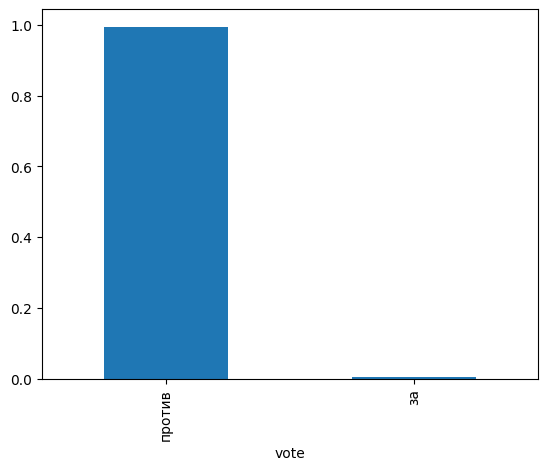

In [68]:
df_ayjigitov['vote'].value_counts(normalize=True).plot.bar()

In [69]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [70]:
votes_numbered = enc.fit_transform(df_ayjigitov['vote'])


In [71]:
df_ayjigitov['votes_numerized'] = votes_numbered

In [72]:
df_ayjigitov['initiators_only'] = df_ayjigitov['initiators'].map(lambda initiator: initiator.replace(initiator[initiator.rfind(','):-1],''))

In [73]:
df_ayjigitov['initiators_numerized']=enc.fit_transform(df_ayjigitov['initiators_only'])

In [74]:
df_ayjigitov['committee_numerized']=enc.fit_transform(df_ayjigitov['committee'])

In [75]:
df_ayjigitov['committee_numerized']

0      9
1      9
2      3
3      3
4      4
      ..
158    3
159    1
160    9
161    9
162    9
Name: committee_numerized, Length: 163, dtype: int64

In [76]:
df_ayjigitov_n = df_ayjigitov.drop(['vote','committee','initiators','initiators_only'], axis=1)

In [77]:
df_ayjigitov_n.head()

,law,reading,votes_numerized,initiators_numerized,committee_numerized
0,О проекте Закона «О праве на доступ к информац...,3,0,17,9
1,О проекте Закона «О внесении изменений в Закон...,2,1,24,9
2,О проекте Закона «О признании утратившим силу ...,2,1,17,3
3,О проекте Закона О внесении изменений в Закон ...,1,1,17,3
4,проекте Закона «О внесении изменений в некотор...,1,1,8,4


In [78]:
df_ayjigitov_n['law_shortened'] =  df_ayjigitov_n['law'].map(lambda law: (law.replace(law[0:law.find('«')],'')) if law.find('«') !=-1 else law)

In [79]:
df_ayjigitov_n['law_shortened'].iloc[0:50]

0                     «О праве на доступ к информации» 
1     «О внесении изменений в Закон Кыргызской Респу...
2     «О признании утратившим силу Закона Кыргызской...
3     «Об игорной деятельности в Кыргызской Республи...
4     «О внесении изменений в некоторые законодатель...
5     «О внесении изменения в Гражданский процессуал...
6     «О стратегическом планировании в Кыргызской Ре...
7     «О внесении изменения в Закон Кыргызской Респу...
8     «О внесении изменения в конституционный Закон ...
9     «Об амнистии в связи 30-летием принятия Консти...
10                  «Об обращении медицинских изделий» 
11                «Об обращении лекарственных средств» 
12    «О практике подготовки и проведения выборов, р...
13    «О внесении изменений в конституционный Закон ...
14    «О внесении изменений в Уголовно-процессуальны...
15     образовании временной депутатской комиссии по...
16    «О ратификации Соглашения между Кабинетом Мини...
17    «О ратификации Протокола о внесении измене

In [80]:
df_ayjigitov_n.columns

Index(['law', 'reading', 'votes_numerized', 'initiators_numerized',
       'committee_numerized', 'law_shortened'],
      dtype='object')

In [81]:
df_ayjigitov_n.drop(['law'], axis=1)

,reading,votes_numerized,initiators_numerized,committee_numerized,law_shortened
0,3,0,17,9,«О праве на доступ к информации»
1,2,1,24,9,«О внесении изменений в Закон Кыргызской Респу...
2,2,1,17,3,«О признании утратившим силу Закона Кыргызской...
3,1,1,17,3,«Об игорной деятельности в Кыргызской Республи...
4,1,1,8,4,«О внесении изменений в некоторые законодатель...
...,...,...,...,...,...
158,3,1,9,3,«О внесении изменений в Закон Кыргызской Респу...
159,2,1,23,1,«О внесении изменения в Закон Кыргызской Респу...
160,2,1,17,9,«О присвоении географического названия «Шейх З...
161,2,1,17,9,«О присвоении географического названия «Король...


In [82]:
df_ayjigitov_n['law_shortened']

0                      «О праве на доступ к информации» 
1      «О внесении изменений в Закон Кыргызской Респу...
2      «О признании утратившим силу Закона Кыргызской...
3      «Об игорной деятельности в Кыргызской Республи...
4      «О внесении изменений в некоторые законодатель...
                             ...                        
158    «О внесении изменений в Закон Кыргызской Респу...
159    «О внесении изменения в Закон Кыргызской Респу...
160    «О присвоении географического названия «Шейх З...
161    «О присвоении географического названия «Король...
162    «О внесении изменения в конституционный Закон ...
Name: law_shortened, Length: 163, dtype: object

In [83]:
import translators as ts

In [84]:
df_ayjigitov_n['law_eng'] = df_ayjigitov_n['law_shortened'].map(lambda law: ts.translate_text(law, translator='google', from_language='ru', to_language='en'))

In [85]:
print(df_ayjigitov_n['law_eng'][99])

“On amnesty in connection with the 30th anniversary of the Constitution of the Kyrgyz Republic and the 75th anniversary of the Universal Declaration of Human Rights”


In [86]:
print(df_ayjigitov_n['law_shortened'][99])

«Об амнистии в связи 30-летием принятия Конституции Кыргызской Республики и 75-летием Всеобщей декларации прав человека» 


In [87]:
df_ayjigitov_n.drop('law_shortened',axis=1)

,law,reading,votes_numerized,initiators_numerized,committee_numerized,law_eng
0,О проекте Закона «О праве на доступ к информац...,3,0,17,9,"""On the right to access information"""
1,О проекте Закона «О внесении изменений в Закон...,2,1,24,9,"""On amendments to the Law of the Kyrgyz Republ..."
2,О проекте Закона «О признании утратившим силу ...,2,1,17,3,“On the recognition of the Law of the Kyrgyz R...
3,О проекте Закона О внесении изменений в Закон ...,1,1,17,3,"""On gambling in the Kyrgyz Republic"""
4,проекте Закона «О внесении изменений в некотор...,1,1,8,4,“On amendments to some legislative acts of the...
...,...,...,...,...,...,...
158,проекте Закона «О внесении изменений в Закон К...,3,1,9,3,“On amendments to the Law of the Kyrgyz Republ...
159,проекте Закона «О внесении изменения в Закон К...,2,1,23,1,“On amendments to the Law of the Kyrgyz Republ...
160,О проекте Закона «О присвоении географического...,2,1,17,9,“On the appropriation of the geographical name...
161,О проекте Закона «О присвоении географического...,2,1,17,9,“On the appropriation of the geographical name...


In [88]:
df_ayjigitov_n['law_shortened']

0                      «О праве на доступ к информации» 
1      «О внесении изменений в Закон Кыргызской Респу...
2      «О признании утратившим силу Закона Кыргызской...
3      «Об игорной деятельности в Кыргызской Республи...
4      «О внесении изменений в некоторые законодатель...
                             ...                        
158    «О внесении изменений в Закон Кыргызской Респу...
159    «О внесении изменения в Закон Кыргызской Респу...
160    «О присвоении географического названия «Шейх З...
161    «О присвоении географического названия «Король...
162    «О внесении изменения в конституционный Закон ...
Name: law_shortened, Length: 163, dtype: object

In [89]:
df_ayjigitov_n.drop(['law'],axis=1,inplace=True)

In [90]:
import nltk


In [91]:
df_ayjigitov_n['law_eng'].iloc[0]

'"On the right to access information"'

In [92]:
from textprocessing import process_text

In [93]:
df_ayjigitov_n['processed_law']=df_ayjigitov_n['law_eng'].map(lambda law: process_text(law))

In [94]:
df_ayjigitov_n['processed_law'][0]

'"on right access information"'

In [95]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [96]:
def process_texty(text):
    for i in range(len(text)):
        r = re.sub('[^a-zA-Z]', ' ', text[i])

        r = text.lower()

        r = r.split()

        r = [word for word in r if word not in stopwords.words('english')]

        r = [lemmatizer.lemmatize(word) for word in r]

        r = ' '.join(r)

        return r

In [97]:
df_ayjigitov_n['processed_law']=df_ayjigitov_n['law_eng'].map(lambda law: process_texty(law))

In [98]:
df_ayjigitov_n['processed_law'][0]

'"on right access information"'

In [99]:
df_ayjigitov_n.iloc[0:5,:]

,reading,votes_numerized,initiators_numerized,committee_numerized,law_shortened,law_eng,processed_law
0,3,0,17,9,«О праве на доступ к информации»,"""On the right to access information""","""on right access information"""
1,2,1,24,9,«О внесении изменений в Закон Кыргызской Респу...,"""On amendments to the Law of the Kyrgyz Republ...","""on amendment law kyrgyz republic"" state civil..."
2,2,1,17,3,«О признании утратившим силу Закона Кыргызской...,“On the recognition of the Law of the Kyrgyz R...,“on recognition law kyrgyz republic“ restorati...
3,1,1,17,3,«Об игорной деятельности в Кыргызской Республи...,"""On gambling in the Kyrgyz Republic""","""on gambling kyrgyz republic"""
4,1,1,8,4,«О внесении изменений в некоторые законодатель...,“On amendments to some legislative acts of the...,“on amendment legislative act kyrgyz republic ...


In [100]:
X = df_ayjigitov_n['processed_law']

y = df_ayjigitov_n['votes_numerized']

In [101]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)

In [109]:
X_train.shape

(81,)

In [110]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv

<81x403 sparse matrix of type '<class 'numpy.int64'>'
	with 1185 stored elements in Compressed Sparse Row format>

In [111]:
X_train_cv.shape

(81, 403)

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [113]:
lr.fit(X_train_cv, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1